<a href="https://colab.research.google.com/github/VaibhavGIT5048/Data_Analysis/blob/main/EPL_2020_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Import The Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
#Load The Dataset
epl_df = pd.read_csv('/content/drive/MyDrive/DATASET/epl_2020-2021.csv')
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [ ]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [ ]:
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [ ]:
#checking the null values
epl_df.isna().sum()

,0
Name,0
Club,0
Nationality,0
Position,0
Age,0
Matches,0
Starts,0
Mins,0
Goals,0
Assists,0


In [ ]:
#create 2 more colums
epl_df['MinsPerMatch'] = (epl_df['Mins']/epl_df['Matches']).astype(int)
epl_df['GoalsPerMatch'] = (epl_df['Goals']/epl_df['Matches']).astype(float)
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [ ]:
#total goals overal goal throuh season

Total_goals = epl_df['Goals'].sum()
print(Total_goals)

986


In [ ]:
#penalty goals

Total_penalty_goals = epl_df['Penalty_Goals'].sum()
print(Total_penalty_goals)


102


In [ ]:
#penalty attempts

Total_penalty_attempts = epl_df['Penalty_Attempted'].sum()
print(Total_penalty_attempts)

125


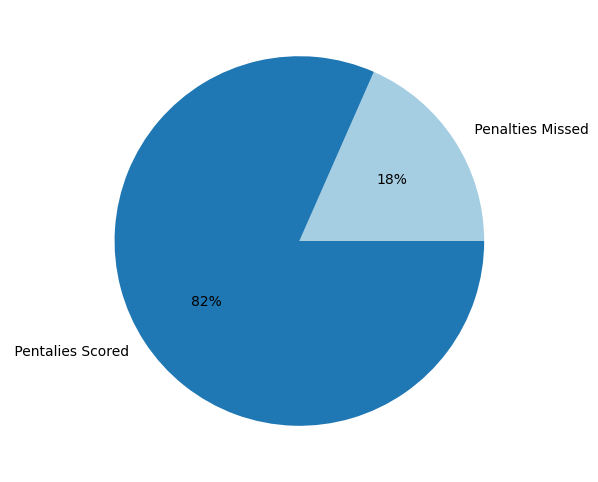

In [ ]:
# Pie chart for penalties missed vs scored
plt.figure(figsize = ( 13 , 6))
pl_not_scored = epl_df['Penalty_Attempted'].sum() - Total_penalty_goals
Data = [pl_not_scored , Total_penalty_goals]
labels = [' Penalties Missed' , ' Pentalies Scored']
color = sns.color_palette('Paired' )[0:5]
plt.pie(Data , labels = labels , colors = color , autopct = '%.0f%%')
plt.show()

In [ ]:
# unique positions for each of the players
#total no of positions in football

epl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [ ]:
#total FW players

epl_df[epl_df['Position'] == 'FW'] #81 player


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [ ]:
# Player from diff nations
np.size((epl_df['Nationality'].unique()))   #59 nations

59

<Axes: xlabel='Nationality'>

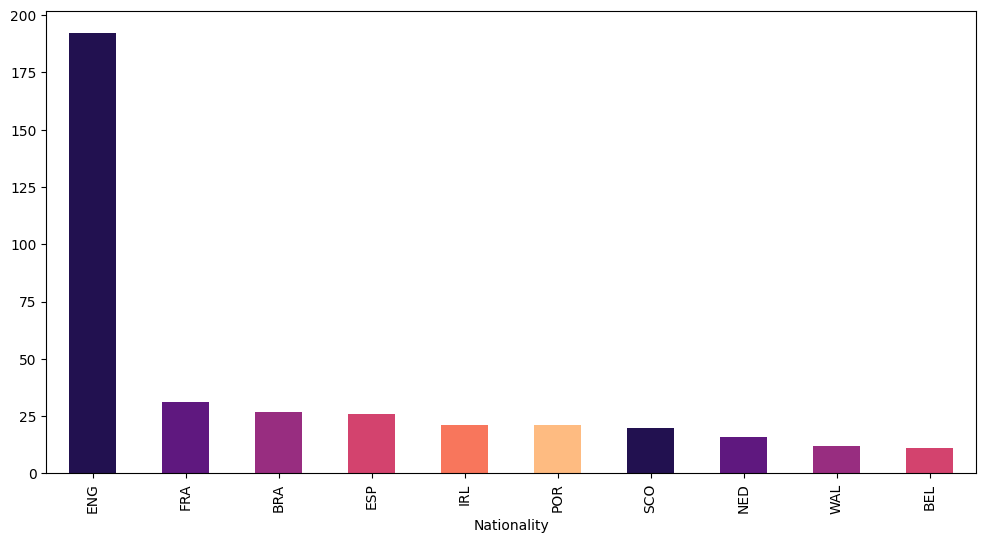

In [ ]:
# max player from which countries
nationality = epl_df.groupby('Nationality').size().sort_values(ascending = False)
nationality.head(10).plot(kind ='bar' , figsize=(12,6) , color = sns.color_palette ('magma' ) ) #10 countries

<Axes: xlabel='Club'>

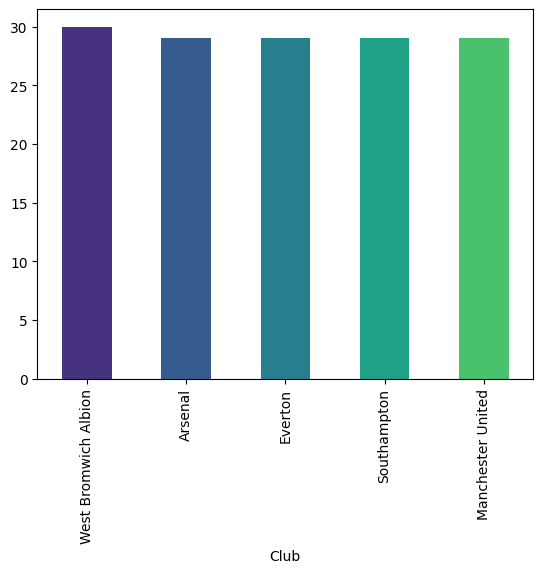

In [ ]:
# club with maximum player in their squad

epl_df.value_counts('Club').nlargest(5).plot(kind = 'bar' , color = sns.color_palette('viridis')) # Call value_counts on the dataframe, rather than on a column

<Axes: xlabel='Club'>

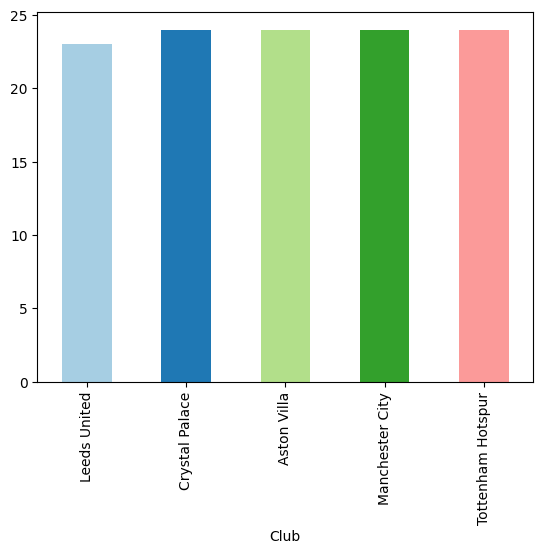

In [ ]:
# club with least number player in their squad

epl_df.value_counts('Club').nsmallest(5).plot(kind = 'bar' , color = sns.color_palette('Paired'))

In [ ]:
# players based on age group based on :
# less than 20 yrs , between 22-25 , from 25-30 , above 30

under20 = epl_df[epl_df['Age'] <= 20]
age20_25 = epl_df[(epl_df['Age'] > 20) & (epl_df['Age'] <= 25)]
age25_30 = epl_df[(epl_df['Age'] > 25) & (epl_df['Age'] <= 30)]
above30 = epl_df[epl_df['Age'] > 30]


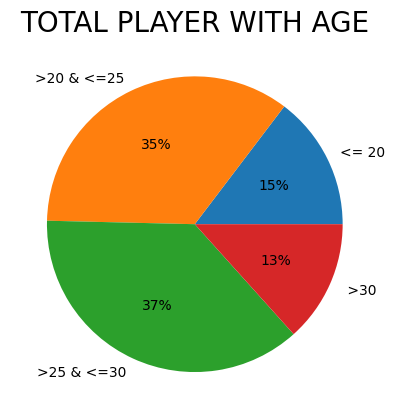

In [ ]:
x = np.array([under20['Name'].count() , age20_25['Name'].count() , age25_30['Name'].count() , above30['Name'].count()])
mylables = [ "<= 20 " , ">20 & <=25" , ">25 & <=30" , " >30"]
plt.title('TOTAL PLAYER WITH AGE' , fontsize = 20)
plt.pie(x , labels = mylables , autopct = '%.0f%%')
plt.show()

<Axes: xlabel='Club'>

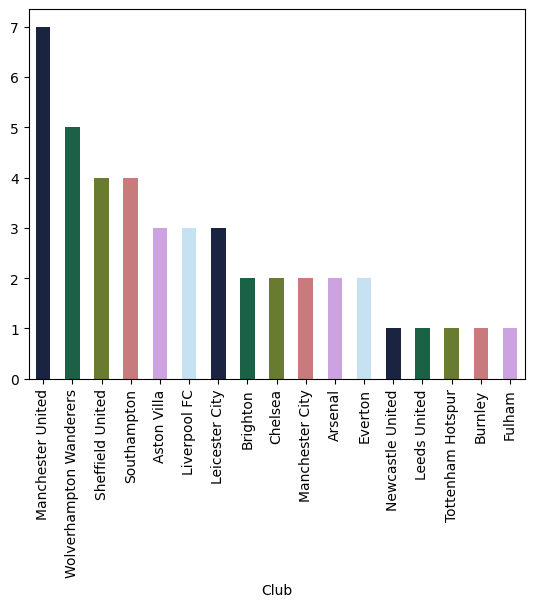

In [ ]:
# TOTAL UNDER 20 PLAYER IN EACH CLUB
players_under_20 = epl_df [ epl_df['Age'] < 20 ]
players_under_20['Club'].value_counts().plot(kind = 'bar' , color = sns.color_palette('cubehelix'))

In [ ]:
# PLAYERS UNDER 20 IN MANU

players_under_20[players_under_20["Club"] == 'Manchester United']


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0.000000


In [ ]:
# PLAYERS UNDER 20 IN CHELSEA

players_under_20[players_under_20["Club"] == 'Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0.000000


<ipython-input-59-eb6a41f2d47c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Club' , y = 'Age' , data = epl_df , palette='Paired')


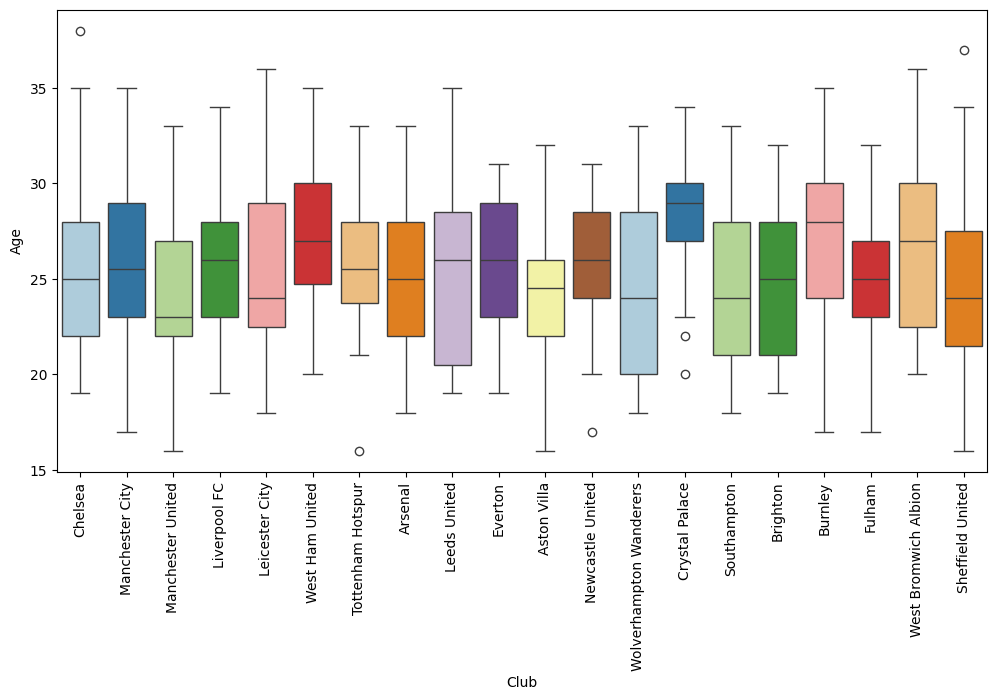

In [ ]:
# Average age of the players in each club

plt.figure(figsize = (12,6))
sns.boxplot(x = 'Club' , y = 'Age' , data = epl_df , palette='Paired')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
num_player = epl_df.groupby('Club').size()
data = (epl_df.groupby('Club')['Age'].sum())/num_player
data.sort_values(ascending = False)

,0
Club,
Crystal Palace,28.333333
West Ham United,27.500000
Burnley,27.040000
West Bromwich Albion,26.766667
Newcastle United,26.074074
Manchester City,25.708333
Tottenham Hotspur,25.625000
Chelsea,25.592593
Leicester City,25.592593


<ipython-input-67-63b61cd9d145>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Club', y='Assists', data=Assists_by_clubs.sort_values(by="Assists"),palette = 'icefire')


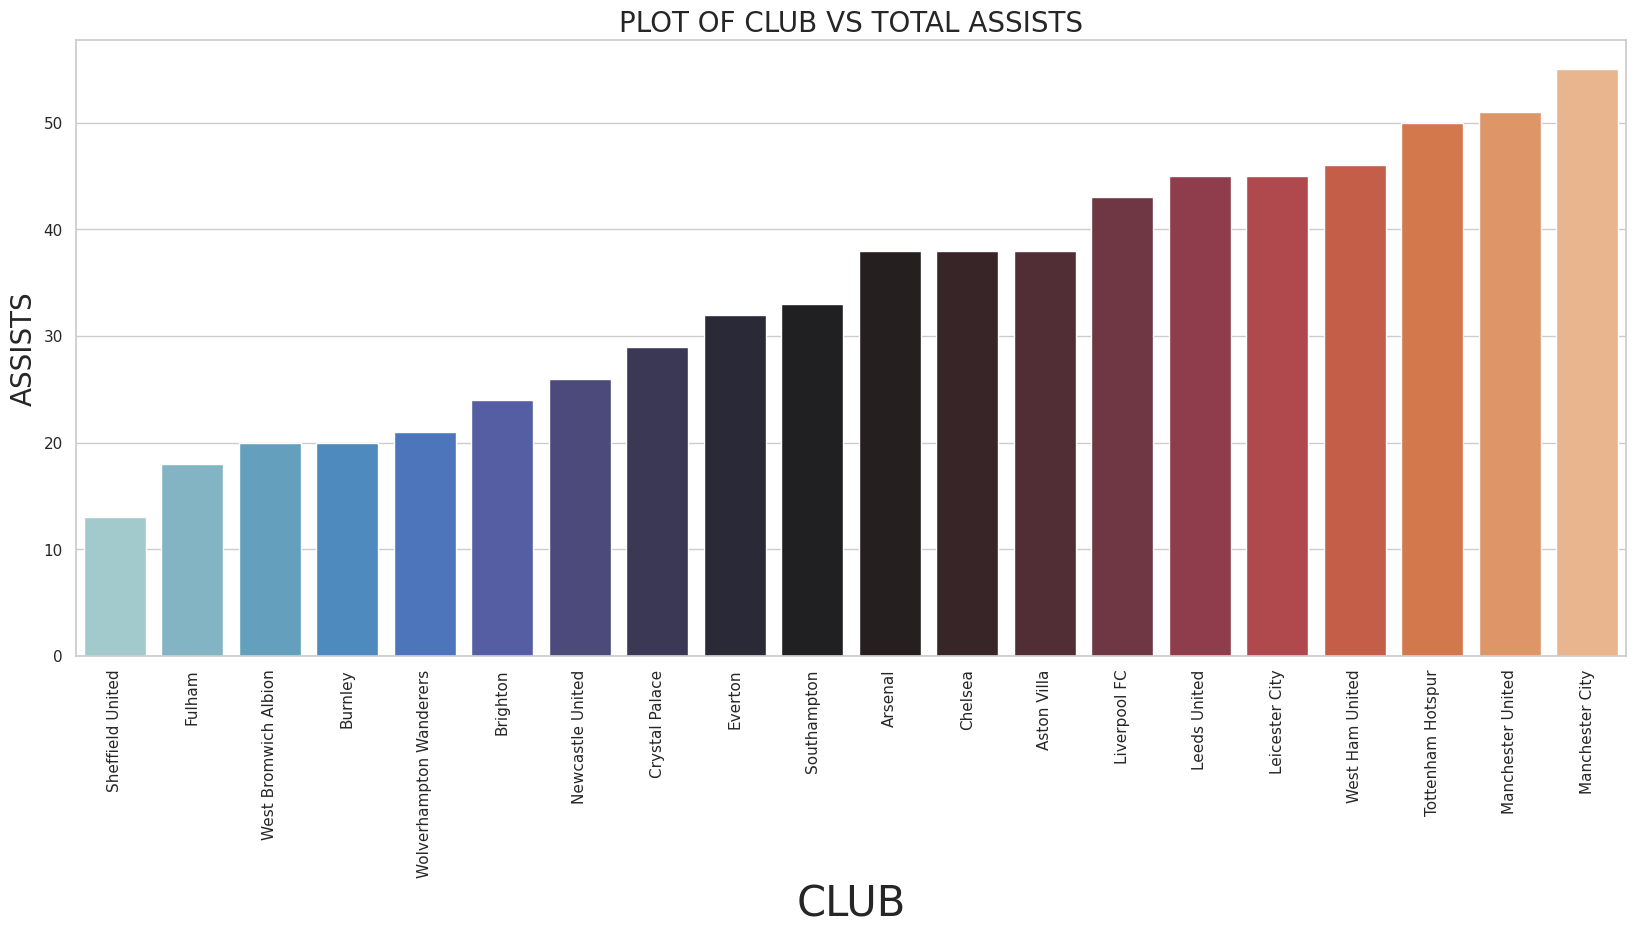

In [ ]:
#TOTAL ASSSITS FROM EACH CLUB

Assists_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Assists'].sum())
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Club', y='Assists', data=Assists_by_clubs.sort_values(by="Assists"),palette = 'icefire')
ax.set_xlabel("CLUB" , fontsize = 30)
ax.set_ylabel("ASSISTS" , fontsize = 20)
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('PLOT OF CLUB VS TOTAL ASSISTS' , fontsize = 20)
plt.show()

In [ ]:
#Top 10 Assists
top_10_assists = epl_df[['Name','Club','Assists', 'Matches']].nlargest(n=10,columns=['Assists'])
print("Top 10 Assists")
top_10_assists


Top 10 Assists


,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


<ipython-input-73-32669230d403>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Club', y='Goals', data=Goals_by_clubs.sort_values(by="Goals"),palette = 'icefire')


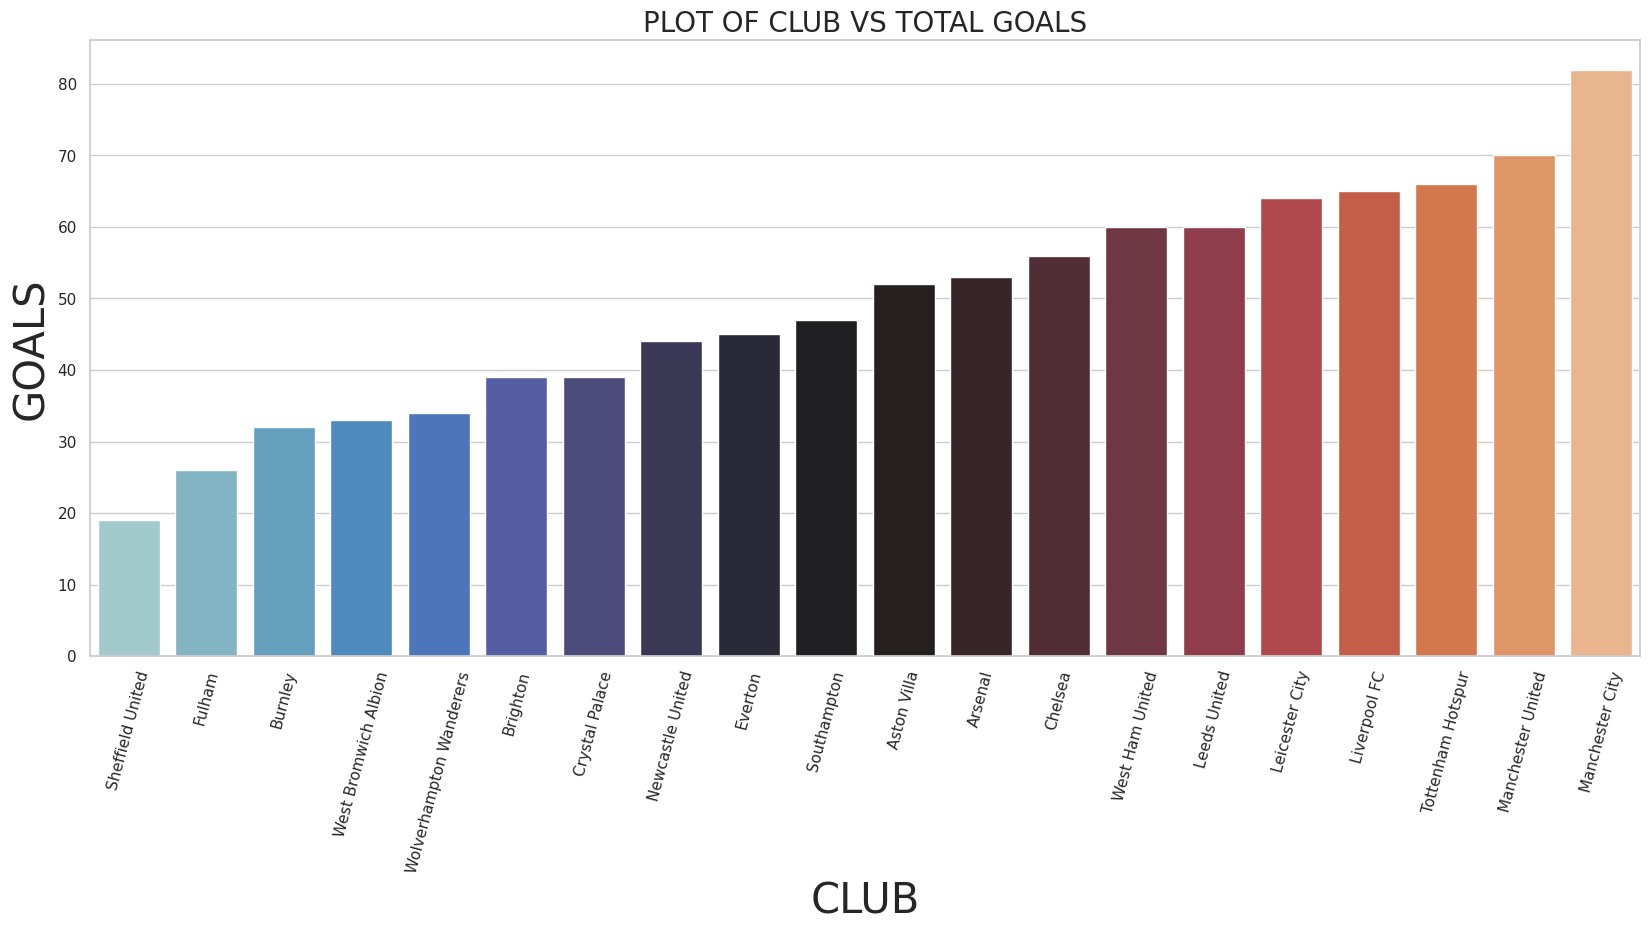

In [ ]:
Goals_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Goals'].sum())
sns.set_theme(style="whitegrid" , color_codes =True)
ax = sns.barplot(x='Club', y='Goals', data=Goals_by_clubs.sort_values(by="Goals"),palette = 'icefire')
ax.set_xlabel("CLUB" , fontsize = 30)
ax.set_ylabel("GOALS" , fontsize = 30)
plt.xticks(rotation = 75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('PLOT OF CLUB VS TOTAL GOALS' , fontsize = 20)
plt.show()

In [ ]:
#Most goals by players

top_10_goals = epl_df[['Name','Club','Goals','Matches']].nlargest(n=10,columns=['Goals'])
print("Top 10 Goals")
top_10_goals

Top 10 Goals


,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [ ]:
#goals per match
#top 10 (%)

top_10_goals_per_match = epl_df[['Name','Club','Goals','GoalsPerMatch','Matches']].nlargest(n=10,columns=['GoalsPerMatch']) #block 15
print("Top 10 Goals Per Match") # total no of goals / total no of matches
top_10_goals_per_match


Top 10 Goals Per Match


,Name,Club,Goals,GoalsPerMatch,Matches
162,Harry Kane,Tottenham Hotspur,23,0.657143,35
81,Mohamed Salah,Liverpool FC,22,0.594595,37
307,Joe Willock,Newcastle United,8,0.571429,14
145,Jesse Lingard,West Ham United,9,0.562500,16
175,Gareth Bale,Tottenham Hotspur,11,0.550000,20
74,Anthony Elanga,Manchester United,1,0.500000,2
51,Bruno Fernandes,Manchester United,18,0.486486,37
237,Dominic Calvert-Lewin,Everton,16,0.484848,33
120,Kelechi Iheanacho,Leicester City,12,0.480000,25
92,Diogo Jota,Liverpool FC,9,0.473684,19


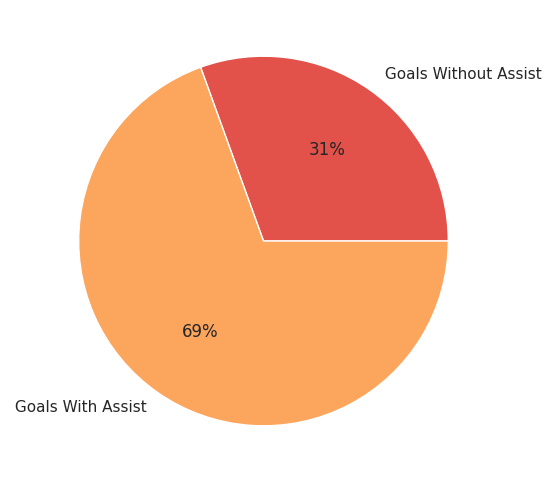

In [ ]:
#pie chart - goals with assist and without assist

plt.figure(figsize = ( 13 , 6))
assists = epl_df['Assists'].sum()
data = [Total_goals - assists , assists]
labels = [' Goals Without Assist' , ' Goals With Assist']
color = sns.color_palette("Spectral" )[0:5]
plt.pie(data , labels = labels , colors = color , autopct = '%.0f%%')
plt.show()

<ipython-input-84-e28aa804306d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c = sns.barplot( x = epl_yellow['Name'] , y = epl_yellow['Yellow_Cards'] , palette = 'cubehelix')
<ipython-input-84-e28aa804306d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(c.get_xticklabels() , rotation = 45 )


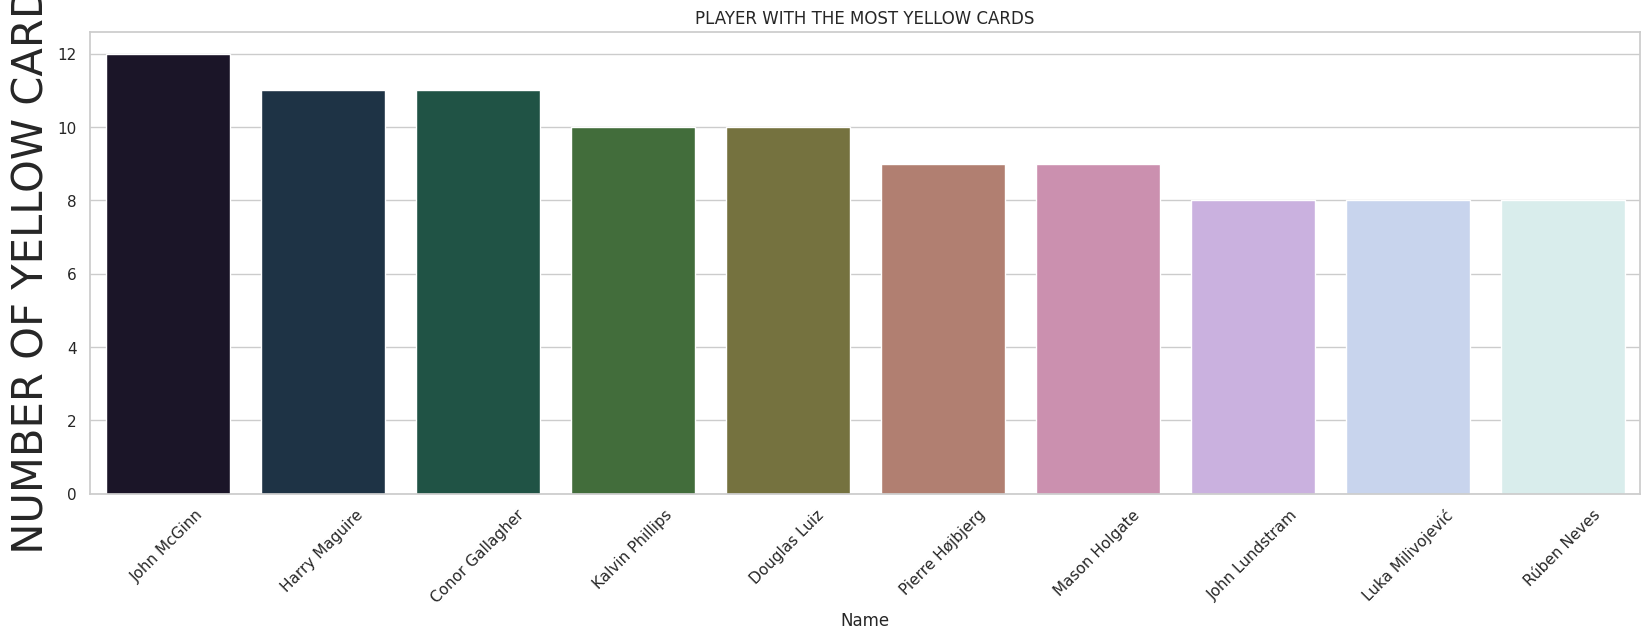

In [ ]:
# top 10 player with most yellow card

epl_yellow= epl_df.sort_values(by = 'Yellow_Cards' , ascending = False)[:10]
plt.figure(figsize = (20 , 6))
plt.title("PLAYER WITH THE MOST YELLOW CARDS")
c = sns.barplot( x = epl_yellow['Name'] , y = epl_yellow['Yellow_Cards'] , palette = 'cubehelix')
plt.ylabel(' NUMBER OF YELLOW CARDS',  fontsize = 30)
c.set_xticklabels(c.get_xticklabels() , rotation = 45 )
plt.show()


In [14]:
# Load the data
file_path = '/content/drive/MyDrive/DATASET/epl_2020-2021.csv'
data = pd.read_csv(file_path)

# Sort the data by 'Mins' (minutes played) in descending order and select the top 5 players
top_5_players = data.sort_values(by='Mins', ascending=False).head(5)

# Display the top 5 players
print("Top 5 players based on minutes played in EPL 2020-2021:")
print(top_5_players[['Name', 'Club', 'Mins', 'Goals', 'Assists']])


Top 5 players based on minutes played in EPL 2020-2021:
                  Name               Club  Mins  Goals  Assists
264  Emiliano Martínez        Aston Villa  3420      0        0
366  James Ward-Prowse        Southampton  3420      8        7
505     Aaron Ramsdale   Sheffield United  3420      0        0
108  Kasper Schmeichel     Leicester City  3420      0        0
159    Pierre Højbjerg  Tottenham Hotspur  3420      2        4


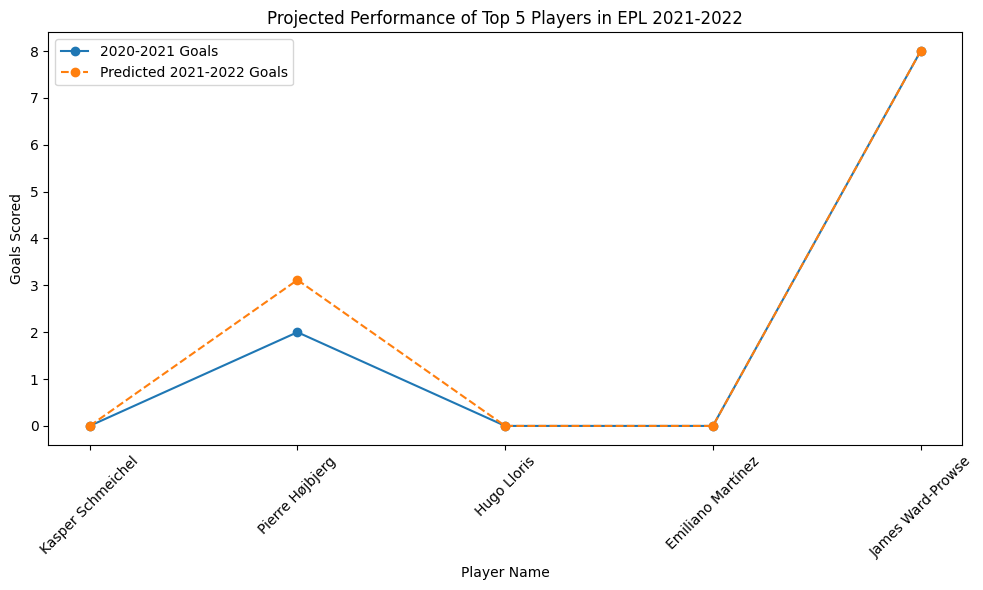

In [5]:
# Load the data
file_path = '/content/drive/MyDrive/DATASET/epl_2020-2021.csv'
data = pd.read_csv(file_path)

# Select the top 5 players based on minutes played
top_5_players = data.nlargest(5, 'Mins')

# Use columns such as 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed' as features
features = ['Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed']
X = top_5_players[features]

# Target: predicting goals for the next season (using Goals as a proxy)
y = top_5_players['Goals']

# Train a simple regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the performance for the next season
predictions = model.predict(X)

# Visualizing the actual vs predicted performance
plt.figure(figsize=(10, 6))

# Plot actual performance (EPL 2020-2021)
plt.plot(top_5_players['Name'], top_5_players['Goals'], label="2020-2021 Goals", marker='o')

# Plot predicted performance (projected for EPL 2021-2022)
plt.plot(top_5_players['Name'], predictions, label="Predicted 2021-2022 Goals", marker='o', linestyle='--')

plt.title("Projected Performance of Top 5 Players in EPL 2021-2022")
plt.xlabel("Player Name")
plt.ylabel("Goals Scored")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the graph
plt.show()


In [9]:
# Calculate Mean Squared Error (MSE)
# predictions were made for the whole dataset (X),
# so we should compare with the whole target (y) for a proper evaluation
mse = mean_squared_error(y, predictions)

# Calculate R-squared (R2)
r2 = r2_score(y, predictions)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")            #The R-squared (R²) value you have shown is 0.974, which is very close to 1.
                                          # This means that the model explains 97.4% of the variance in the target variable (goals) based on the features used.
                                          #In other words, the model is highly accurate in predicting the performance (goals scored) of players in the next season.

Mean Squared Error (MSE): 0.24866473490484647
R-squared (R2): 0.9740974234474118


Top 10 worst-behaved clubs (by red and yellow cards):
                   Red_Cards  Yellow_Cards  Total_Cards
Club                                                   
Sheffield United           3            73           76
Aston Villa                4            71           75
Fulham                     3            67           70
Newcastle United           3            65           68
Manchester United          1            64           65
Leeds United               1            61           62
Everton                    2            59           61
Leicester City             0            61           61
Tottenham Hotspur          2            57           59
Crystal Palace             2            56           58


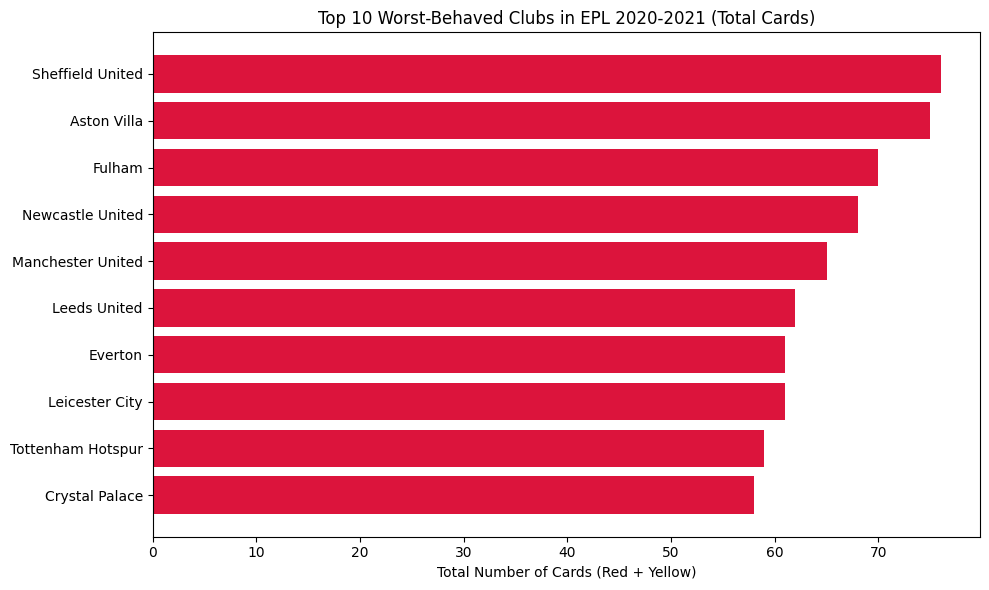

In [17]:
# Load the dataset
file_path = '/content/drive/MyDrive/DATASET/epl_2020-2021.csv'
data = pd.read_csv(file_path)

# Group by 'Club' and sum the 'Red_Cards' and 'Yellow_Cards'
club_discipline = data.groupby('Club')[['Red_Cards', 'Yellow_Cards']].sum()

# Create a new column to store total cards (red and yellow)
club_discipline['Total_Cards'] = club_discipline['Red_Cards'] + club_discipline['Yellow_Cards']

# Sort the clubs based on total cards and get the top 10 worst-behaved clubs
worst_behaved_clubs = club_discipline.sort_values(by='Total_Cards', ascending=False).head(10)

# Display the top 10 clubs with the worst discipline records
print("Top 10 worst-behaved clubs (by red and yellow cards):")
print(worst_behaved_clubs)

# Plot the results using a bar chart
plt.figure(figsize=(10, 6))
plt.barh(worst_behaved_clubs.index, worst_behaved_clubs['Total_Cards'], color='crimson')
plt.xlabel('Total Number of Cards (Red + Yellow)')
plt.title('Top 10 Worst-Behaved Clubs in EPL 2020-2021 (Total Cards)')
plt.gca().invert_yaxis()  # To have the top club at the top of the chart
plt.tight_layout()

# Show the bar chart
plt.show()
